## Step 1: Importing import packages and Reading Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importing libraries


# Importing Pandas and NumPy
import pandas as pd, numpy as np
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# visulaisation
from matplotlib.pyplot import xticks

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics


import statsmodels.api as sm

%matplotlib inline

In [3]:
# Read the dataset
leadscore = pd.read_csv('Leads.csv')

In [4]:
# Let's look at the first five rows
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Shape of the data
leadscore.shape

(9240, 37)

In [6]:
# Let's look at the columns
leadscore.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
# Check the summary
leadscore.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Let's check the info of the data to know the datatypes
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Check for conversion rate in dataframe

In [9]:
# Conversion rate

round(leadscore["Converted"].sum()/len(leadscore.index),2)

0.39

Conversion rate is 39 percent.

## Step 2: Data Cleaning and Preparation

In [10]:
# Check missing values
leadscore.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

There are a lot of missing values in this dataset. A lot of columns have more than 3000 missing values, let's eliminate the columns having greater than 3000 missing values as they are of no use.

In [11]:
# Drop all the columns having more than 3000 missing values

for col in leadscore.columns:
    if leadscore[col].isnull().sum() > 3000:
        leadscore.drop(col, 1, inplace=True)

In [12]:
leadscore.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
# Columns city and country won't be of any use to our analysis, so we can drop these.
leadscore.drop(['City'], axis = 1, inplace = True)

In [14]:
leadscore.drop(['Country'], axis = 1, inplace = True)

In [15]:
# Let's now check the percentage of missing values in each column

round(100*(leadscore.isnull().sum()/len(leadscore.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [16]:
# Get the value counts of all the columns

for column in leadscore:
    print(leadscore[column].astype('category').value_counts())
    print('___________________________________________________')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

As we can see there are 3 columns with a level 'Select' in it, which basically means that the student had not selected the option for that particular column which is why it shows 'Select'.

The following 3 columns have level 'Select'.

In [17]:
leadscore['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [18]:
leadscore['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [19]:
leadscore['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Clearly the levels 'Lead Profile' and 'How did you hear about X Education' have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them. And the column 'Specialization' is an important column so we can drop it.

In [20]:
leadscore.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

As we can see that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include 'Do Not Call', 'Search, Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'. Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

The variable 'What matters most to you in choosing a course' has the level "Better Career" Prospects 6528 times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [21]:
leadscore['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [22]:
leadscore.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque', 'What matters most to you in choosing a course'], axis = 1, inplace = True)

In [23]:
# Check the number of null values again

leadscore.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

As we can see from above that 'What is your current occupation' column have lots of null values. We will not remove the entire columns as, it is an important column instead of that we can remove the null values rows.

In [24]:
leadscore = leadscore[~pd.isnull(leadscore['What is your current occupation'])]

In [25]:
# Check the number of null values again

leadscore.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [26]:
leadscore['Converted'].value_counts()

0    3359
1    3191
Name: Converted, dtype: int64

In [27]:
# Drop the null value rows in the column 'TotalVisits'

leadscore = leadscore[~pd.isnull(leadscore['TotalVisits'])]

In [28]:
# Check the null values again

leadscore.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [29]:
# Drop the null values rows in the column 'Lead Source'

leadscore = leadscore[~pd.isnull(leadscore['Lead Source'])]

In [30]:
# Check the number of null values again

leadscore.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [31]:
# Drop the null values rows in the column 'Specialization'

leadscore = leadscore[~pd.isnull(leadscore['Specialization'])]

In [32]:
# Check the number of null values again

leadscore.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [33]:
print(len(leadscore.index))
print(len(leadscore.index)/9240)

6373
0.6897186147186147


We still have around 69% of the rows which seems good enough.

In [34]:
# Let's look at the dataset again

leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


Now, clearly the variables Prospect ID won't be of any use in the analysis, so it's best that we drop these two variables.

In [35]:
leadscore.drop(['Prospect ID'], 1, inplace = True)

In [36]:
leadscore.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [37]:
leadscore.shape

(6373, 13)

In [38]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             6373 non-null   int64  
 1   Lead Origin                             6373 non-null   object 
 2   Lead Source                             6373 non-null   object 
 3   Do Not Email                            6373 non-null   object 
 4   Converted                               6373 non-null   int64  
 5   TotalVisits                             6373 non-null   float64
 6   Total Time Spent on Website             6373 non-null   int64  
 7   Page Views Per Visit                    6373 non-null   float64
 8   Last Activity                           6373 non-null   object 
 9   Specialization                          6373 non-null   object 
 10  What is your current occupation         6373 non-null   obje

In [39]:
leadscore.dtypes

Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

## Exploratory Data Analysis

# Numerical columns

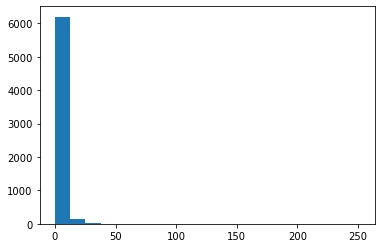

In [40]:
plt.hist(leadscore['TotalVisits'], bins=20)
plt.show()

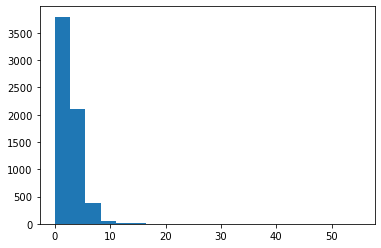

In [41]:
plt.hist(leadscore['Page Views Per Visit'], bins=20)
plt.show()

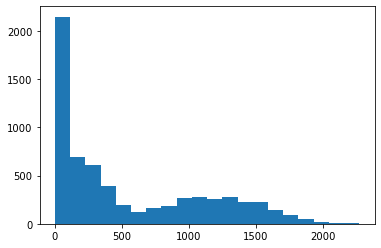

In [42]:
plt.hist(leadscore['Total Time Spent on Website'], bins=20)
plt.show()

# Heatmap

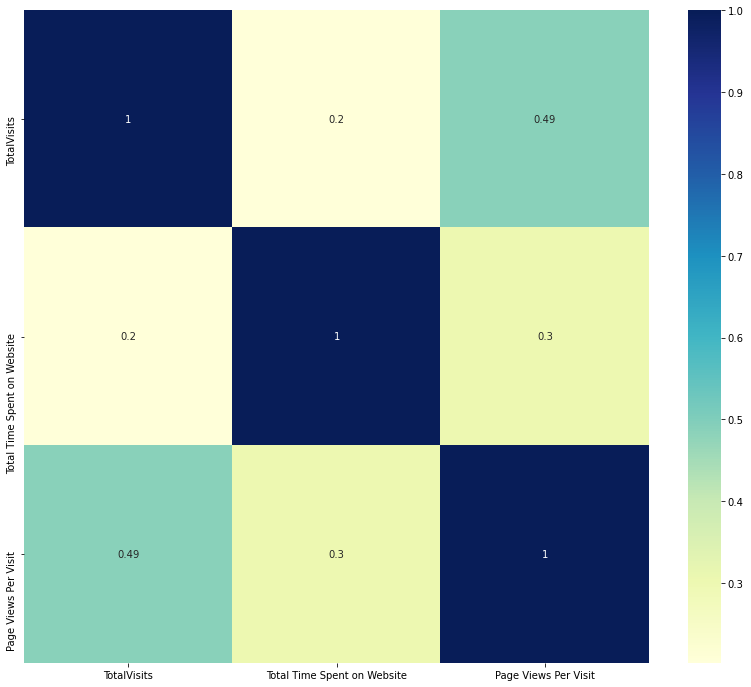

In [43]:
plt.figure(figsize = (14,12))
sns.heatmap(leadscore[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr(), cmap="YlGnBu", annot = True)
plt.show()

# Check for outliers

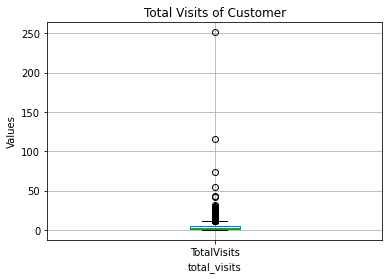

In [44]:
#plotting TotalVisits to show outliers
ax = leadscore.boxplot(column='TotalVisits')
plt.title('Total Visits of Customer')
ax.set_xlabel('total_visits')
ax.set_ylabel('Values')
plt.show()

We can see presence of outliers here.

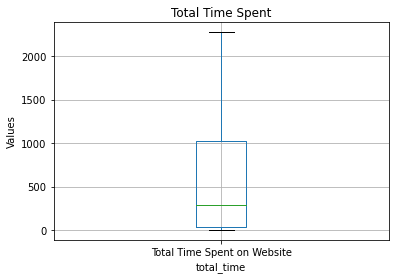

In [45]:
#plotting Total Time Spent on Website to show outliers
ax = leadscore.boxplot(column='Total Time Spent on Website')
plt.title('Total Time Spent')
ax.set_xlabel('total_time')
ax.set_ylabel('Values')
plt.show()

Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column.

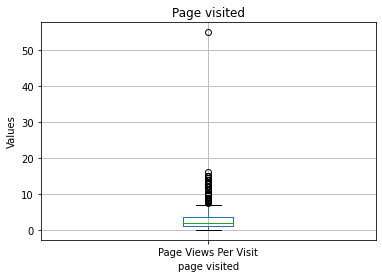

In [46]:
#plotting Page Views Per Visit on Website to show outliers
ax = leadscore.boxplot(column='Page Views Per Visit')
plt.title('Page visited')
ax.set_xlabel('page visited')
ax.set_ylabel('Values')
plt.show()

We observe that 'TotalVisits' and 'Page Views Per Visit' variables have huge outliers. So we will use 1.5 IQR rule to remove outliers.

# Perform outlier treatment

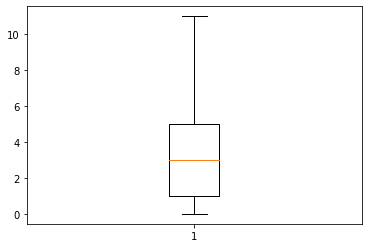

In [47]:
# Treating outliers of TotalVisits
Q1 = leadscore.TotalVisits.quantile(0.25)
Q3 = leadscore.TotalVisits.quantile(0.75)
IQR = Q3 - Q1
leadscore = leadscore[(leadscore.TotalVisits >= Q1 - 1.5*IQR) & (leadscore.TotalVisits <= Q3 + 1.5*IQR)]
plt.boxplot(leadscore.TotalVisits)
plt.show()

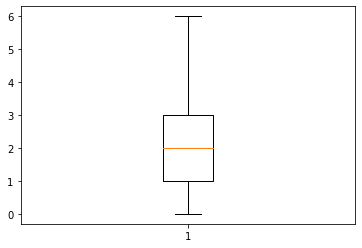

In [48]:
# Treating outliers of Page Views Per visit
Q1 = leadscore['Page Views Per Visit'].quantile(0.25)
Q3 = leadscore['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leadscore = leadscore[(leadscore['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leadscore['Page Views Per Visit'] <= Q3 + 1.5*IQR)]
plt.boxplot(leadscore['Page Views Per Visit'])
plt.show()

In [49]:
leadscore.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,5947.000000,5947.000000,5947.000000,5947.000000,5947.000000
mean,616232.349084,0.479906,2.941819,522.567009,2.184014
std,23336.150910,0.499638,2.426167,563.413076,1.640378
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,595776.500000,0.000000,1.000000,22.000000,1.000000
50%,613818.000000,0.000000,3.000000,274.000000,2.000000
75%,637073.500000,1.000000,4.000000,1010.500000,3.000000
max,660737.000000,1.000000,11.000000,2272.000000,6.000000


In [50]:
leadscore.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


## Categorical columns

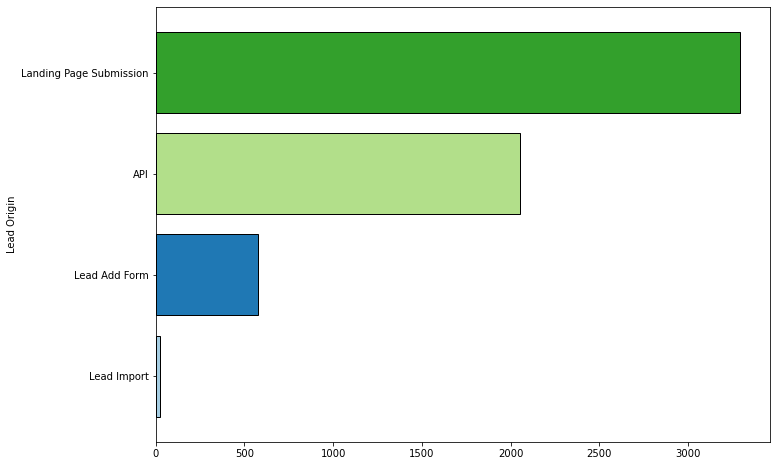

In [51]:
# let's plot bargraph of lead origin
plt.figure(figsize = (11, 8))

leadscore.groupby('Lead Origin')['Lead Number'].count().sort_values().plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(leadscore))))
plt.show()

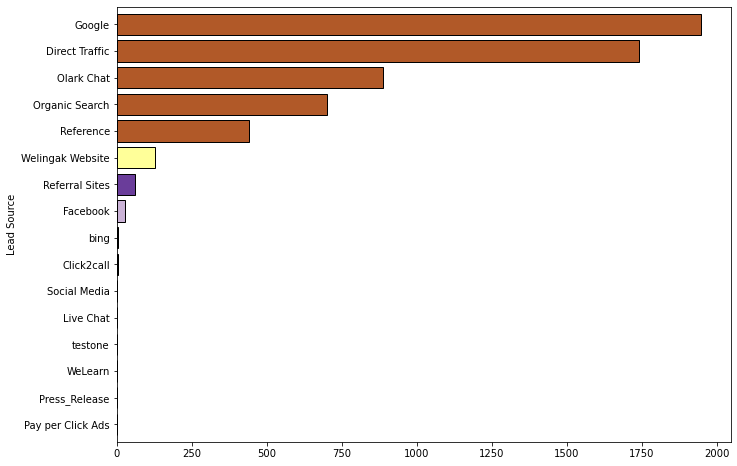

In [52]:
# let's plot bargraph of Lead Source
plt.figure(figsize = (11, 8))

leadscore.groupby('Lead Source')['Lead Number'].count().sort_values().plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(leadscore))))
plt.show()

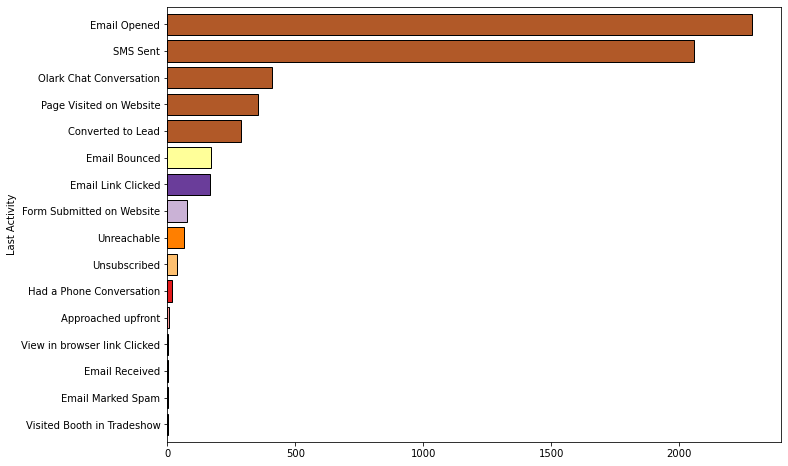

In [53]:
# let's plot bargraph of Last Activity
plt.figure(figsize = (11, 8))

leadscore.groupby('Last Activity')['Lead Number'].count().sort_values().plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(leadscore))))
plt.show()

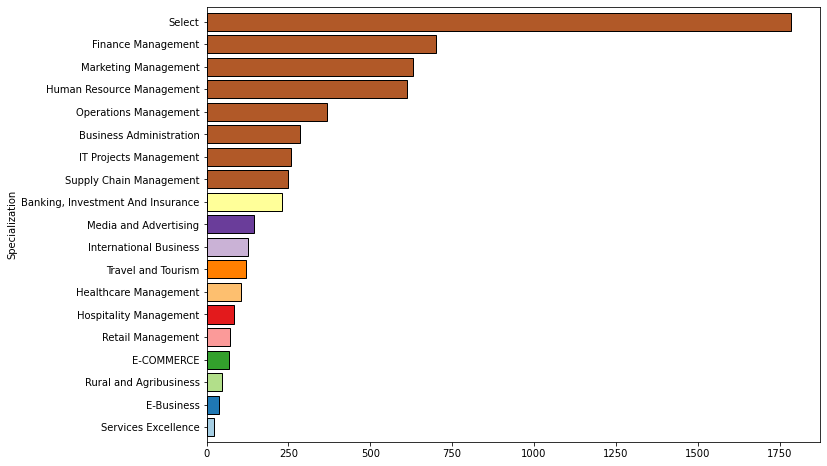

In [54]:
# let's plot bargraph of Specialization
plt.figure(figsize = (11, 8))

leadscore.groupby('Specialization')['Lead Number'].count().sort_values().plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(leadscore))))
plt.show()

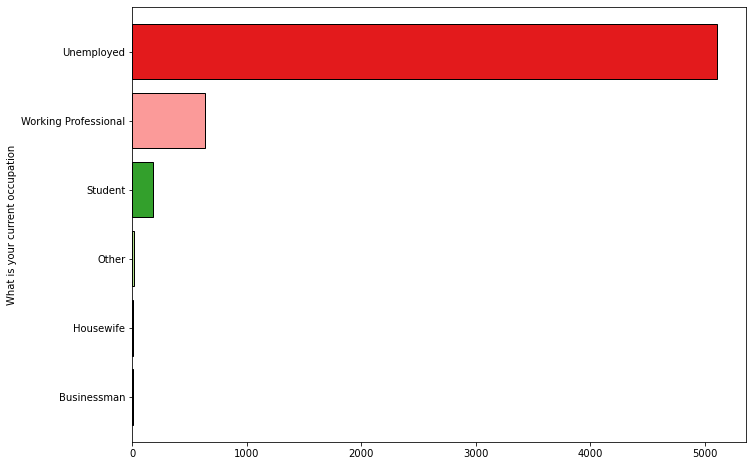

In [55]:
# let's plot bargraph of What is your current occupation
plt.figure(figsize = (11, 8))

leadscore.groupby('What is your current occupation')['Lead Number'].count().sort_values().plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(leadscore))))
plt.show()

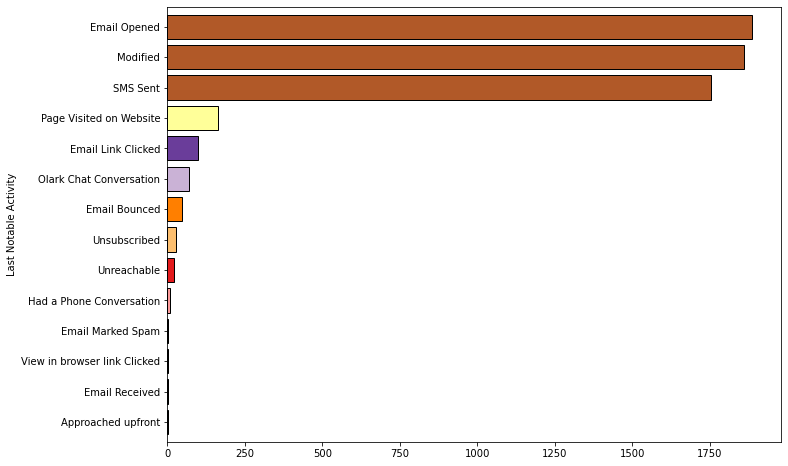

In [56]:
# let's plot bargraph of Last Notable Activity
plt.figure(figsize = (11, 8))

leadscore.groupby('Last Notable Activity')['Lead Number'].count().sort_values().plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(leadscore))))
plt.show()

## Dummy variable creation

In [57]:
# Check the columns which are of type 'object'

temp = leadscore.loc[:, leadscore.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [58]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leadscore[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leadscore = pd.concat([leadscore, dummy], axis=1)

In [59]:
#Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leadscore['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leadscore = pd.concat([leadscore, dummy_spl], axis = 1)

In [60]:
# Drop the variables for which the dummy variables have been created

leadscore = leadscore.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [61]:
# 'Lead Number' is not needed anymore so we gonna remove that.
leadscore.drop(['Lead Number'], 1, inplace = True)

In [62]:
# Let's take a look at the dataset again

leadscore.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


 ## Test-Train Split

In [63]:
# Put all the feature variables in X

X = leadscore.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# Put the target variable in y

y = leadscore['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [66]:
scaler = StandardScaler()
colsumnsToScale = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[colsumnsToScale] = scaler.fit_transform(X_train[colsumnsToScale])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1871,-1.200474,-0.924488,-1.317923,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6885,1.270328,1.342173,0.509245,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3427,0.034927,-0.655927,0.509245,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1525,0.034927,0.477404,0.509245,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1475,0.034927,1.241910,0.509245,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Looking at the correlations

In [67]:
# Looking at the correlation table
# As the data is too large we will see correlation table instead of heatmap

leadscore.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.000007,0.298723,-0.075521,-0.121419,0.298809,-0.017741,-0.136152,-0.019813,0.017685,...,0.001957,-0.021089,0.049376,-0.005644,0.030596,-0.014013,0.005490,-0.005628,-0.001638,-0.012083
TotalVisits,0.000007,1.000000,0.380470,0.739784,0.456869,-0.374147,-0.080356,0.121462,-0.077770,0.264976,...,0.045596,0.061981,0.035721,0.064462,0.039564,0.029274,0.023276,0.029412,0.049926,0.083972
Total Time Spent on Website,0.298723,0.380470,1.000000,0.381585,0.284935,-0.255975,-0.061467,0.125240,-0.060920,0.244153,...,0.034051,0.014174,0.056759,0.041431,0.052206,0.027467,0.014169,0.004837,0.044821,0.031628
Page Views Per Visit,-0.075521,0.739784,0.381585,1.000000,0.554911,-0.413605,-0.088234,0.157924,-0.083823,0.306341,...,0.064868,0.071765,0.045916,0.071892,0.052409,0.030757,0.012471,0.019981,0.061730,0.104435
Lead Origin_Landing Page Submission,-0.121419,0.456869,0.284935,0.554911,1.000000,-0.364778,-0.073813,0.530513,-0.070194,0.081283,...,0.134727,0.089099,0.091823,0.091478,0.103719,0.071547,0.041926,0.039589,0.112209,0.095835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,-0.014013,0.029274,0.027467,0.030757,0.071547,-0.025856,-0.007336,0.023434,-0.007476,0.024252,...,-0.023575,-0.016221,-0.038140,-0.017501,-0.028391,1.000000,-0.009881,-0.006898,-0.023190,-0.015954
Specialization_Rural and Agribusiness,0.005490,0.023276,0.014169,0.012471,0.041926,-0.016387,-0.005914,0.030256,-0.006028,-0.029951,...,-0.019007,-0.013078,-0.030750,-0.014110,-0.022890,-0.009881,1.000000,-0.005561,-0.018697,-0.012863
Specialization_Services Excellence,-0.005628,0.029412,0.004837,0.019981,0.039589,-0.011245,-0.004129,0.055204,-0.004208,-0.026190,...,-0.013269,-0.009130,-0.021467,-0.009850,-0.015980,-0.006898,-0.005561,1.000000,-0.013053,-0.008980
Specialization_Supply Chain Management,-0.001638,0.049926,0.044821,0.061730,0.112209,-0.034603,-0.001181,0.088138,-0.001683,-0.030226,...,-0.044611,-0.030695,-0.072172,-0.033116,-0.053723,-0.023190,-0.018697,-0.013053,1.000000,-0.030189


In [68]:
## Checking the lead conversion Rate
leadscore_conversion = (sum(leadscore['Converted'])/len(leadscore['Converted'].index))*100
leadscore_conversion

47.990583487472676

## Step 3: Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print("Training Accuracy")
print(logreg.score(X_train,y_train))
print("Testing Accuracy")
print(logreg.score(X_test,y_test))

predicted = logreg.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

Training Accuracy
0.8044209514656415
Testing Accuracy
0.5170868347338936
[[ 72 846]
 [ 16 851]]
              precision    recall  f1-score   support

           0       0.82      0.08      0.14       918
           1       0.50      0.98      0.66       867

    accuracy                           0.52      1785
   macro avg       0.66      0.53      0.40      1785
weighted avg       0.66      0.52      0.40      1785



In [70]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [71]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 40),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 53),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 52),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 50),
 ('Lead Source_Olark Chat', False, 23),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 58),
 ('Lead Source_Press_Release', False, 54),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 34),
 ('Lead Source_WeLearn', False, 46),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 47),
 ('Lead Source_testone', False, 44),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 26),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link Clic

In [72]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [73]:
# Select only the columns selected by RFE

X_train = X_train[col]

Assessing the model with StatsModels

In [74]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4162
Model:                            GLM   Df Residuals:                     4146
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1914.7
Date:                Fri, 12 Nov 2021   Deviance:                       3829.5
Time:                        07:31:47   Pearson chi2:                 4.24e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4228      0.107      3.961      0.000       0.214       0.632
Total Time Spent on Website                              1.0979      0.048     22.672      0.000       1.003       1.193
Lead Origin_Lead Add Form                               -0.3815      1.167     -0.327      0.744      -2.669       1.906
Lead Source_Direct Traffic                              -1.8290      0.134    -13.622      0.000      -2.092      -1.566
Lead Source_Google                                      -1.3096      0.128    -10.211      0.000      -1.561      -1.058
Lead Source_Organic Search                              -1.5484      0.157     -9.858      0.000      -1.856      -1.241
Lead Source_Reference                                    2.6209      1.186      2.210      0.027       0.297       4.945
Lead Source_Referral Sites                              -1.6838      0.436     -3.860      0.000      -2.539      -0.829
Lead Source_Welingak Website                             4.3664      1.369      3.190      0.001       1.684       7.049
Do Not Email_Yes                                        -1.4180      0.195     -7.269      0.000      -1.800      -1.036
Last Activity_Had a Phone Conversation                   1.8988      0.778      2.440      0.015       0.374       3.424
Last Activity_Olark Chat Conversation                   -1.4691      0.202     -7.284      0.000      -1.864      -1.074
Last Activity_SMS Sent                                   1.2041      0.086     13.973      0.000       1.035       1.373
What is your current occupation_Housewife               22.8957   1.49e+04      0.002      0.999   -2.91e+04    2.92e+04
What is your current occupation_Working Professional     2.3770      0.187     12.742      0.000       2.011       2.743
Last Notable Activity_Unreachable                        2.5186      0.831      3.031      0.002       0.890       4.147
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than 0.05. 

In [75]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.356115
6885    0.516844
3427    0.106556
1525    0.882290
1475    0.945509
8067    0.417019
6083    0.112913
3270    0.850168
3223    0.403463
1996    0.042678
dtype: float64

In [76]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.35611483, 0.51684389, 0.10655639, 0.88229014, 0.94550891,
       0.41701901, 0.11291304, 0.85016753, 0.40346268, 0.04267759])

In [77]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Leadscore_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Leadscore_Prob,CustID
0,0,0.356115,1871
1,1,0.516844,6885
2,0,0.106556,3427
3,0,0.882290,1525
4,1,0.945509,1475


In [78]:
#Creating new column 'predicted' with 1 if Lead_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Leadscore_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [79]:
# Let's see the head
y_train_pred_final.head()

,Converted,Leadscore_Prob,CustID,predicted
0,0,0.356115,1871,0
1,1,0.516844,6885,1
2,0,0.106556,3427,0
3,0,0.882290,1525,1
4,1,0.945509,1475,1


In [80]:
#assigning leadscore score [Leadscore score = 100*(probability of converted)]
y_train_pred_final['leadscore_score']= y_train_pred_final.Leadscore_Prob.map(lambda x: x*100)
y_train_pred_final.head()

,Converted,Leadscore_Prob,CustID,predicted,leadscore_score
0,0,0.356115,1871,0,35.611483
1,1,0.516844,6885,1,51.684389
2,0,0.106556,3427,0,10.655639
3,0,0.882290,1525,1,88.229014
4,1,0.945509,1475,1,94.550891


In [81]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1804  371]
 [ 522 1465]]


In [82]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7854396924555502


Checking VIFs

In [83]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,100.78
5,Lead Source_Reference,77.16
7,Lead Source_Welingak Website,24.78
11,Last Activity_SMS Sent,1.51
3,Lead Source_Google,1.29
2,Lead Source_Direct Traffic,1.22
13,What is your current occupation_Working Profes...,1.21
0,Total Time Spent on Website,1.19
4,Lead Source_Organic Search,1.10
8,Do Not Email_Yes,1.09


VIFs seem to be in a decent range except for three variables.

Let's first drop the variable Lead Origin_Lead Add Form , since it has a high VIF as well as a high p-value.

In [84]:
col = col.drop('Lead Origin_Lead Add Form', 1)

In [85]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4162
Model:                            GLM   Df Residuals:                     4147
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1914.8
Date:                Fri, 12 Nov 2021   Deviance:                       3829.6
Time:                        07:31:48   Pearson chi2:                 4.24e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4201      0.106      3.947      0.000       0.211       0.629
Total Time Spent on Website                              1.0978      0.048     22.667      0.000       1.003       1.193
Lead Source_Direct Traffic                              -1.8263      0.134    -13.627      0.000      -2.089      -1.564
Lead Source_Google                                      -1.3070      0.128    -10.210      0.000      -1.558      -1.056
Lead Source_Organic Search                              -1.5458      0.157     -9.854      0.000      -1.853      -1.238
Lead Source_Reference                                    2.2419      0.248      9.040      0.000       1.756       2.728
Lead Source_Referral Sites                              -1.6811      0.436     -3.855      0.000      -2.536      -0.826
Lead Source_Welingak Website                             3.9873      0.727      5.488      0.000       2.563       5.411
Do Not Email_Yes                                        -1.4175      0.195     -7.267      0.000      -1.800      -1.035
Last Activity_Had a Phone Conversation                   1.8988      0.778      2.440      0.015       0.374       3.424
Last Activity_Olark Chat Conversation                   -1.4674      0.202     -7.278      0.000      -1.863      -1.072
Last Activity_SMS Sent                                   1.2042      0.086     13.975      0.000       1.035       1.373
What is your current occupation_Housewife               22.8958   1.49e+04      0.002      0.999   -2.91e+04    2.92e+04
What is your current occupation_Working Professional     2.3772      0.187     12.743      0.000       2.012       2.743
Last Notable Activity_Unreachable                        2.5186      0.831      3.031      0.002       0.890       4.147
========================================================================================================================
"""

In [86]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.355532
6885    0.516786
3427    0.106566
1525    0.882299
1475    0.945507
8067    0.417036
6083    0.112820
3270    0.850141
3223    0.403490
1996    0.042700
dtype: float64

In [87]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.35553155, 0.51678556, 0.1065655 , 0.88229863, 0.94550663,
       0.41703647, 0.11281995, 0.85014133, 0.40349001, 0.04269957])

In [88]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Prob,CustID
0,0,0.355532,1871
1,1,0.516786,6885
2,0,0.106566,3427
3,0,0.882299,1525
4,1,0.945507,1475


In [89]:
#Creating new column 'predicted' with 1 if Lead_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [90]:
#assigning lead score [Lead score = 100*(probability of converted)]
y_train_pred_final['leadscore_score']= y_train_pred_final.Lead_Prob.map(lambda x: x*100)

y_train_pred_final.head()

,Converted,Lead_Prob,CustID,predicted,leadscore_score
0,0,0.355532,1871,0,35.553155
1,1,0.516786,6885,1,51.678556
2,0,0.106566,3427,0,10.656550
3,0,0.882299,1525,1,88.229863
4,1,0.945507,1475,1,94.550663


In [91]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


0.7854396924555502


So overall the accuracy hasn't dropped much.

Let's check the VIFs again

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_SMS Sent,1.50
2,Lead Source_Google,1.29
4,Lead Source_Reference,1.24
1,Lead Source_Direct Traffic,1.22
12,What is your current occupation_Working Profes...,1.21
0,Total Time Spent on Website,1.19
3,Lead Source_Organic Search,1.10
7,Do Not Email_Yes,1.09
6,Lead Source_Welingak Website,1.06
9,Last Activity_Olark Chat Conversation,1.05


In [93]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4162
Model:                            GLM   Df Residuals:                     4147
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1914.8
Date:                Fri, 12 Nov 2021   Deviance:                       3829.6
Time:                        07:31:49   Pearson chi2:                 4.24e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4201      0.106      3.947      0.000       0.211       0.629
Total Time Spent on Website                              1.0978      0.048     22.667      0.000       1.003       1.193
Lead Source_Direct Traffic                              -1.8263      0.134    -13.627      0.000      -2.089      -1.564
Lead Source_Google                                      -1.3070      0.128    -10.210      0.000      -1.558      -1.056
Lead Source_Organic Search                              -1.5458      0.157     -9.854      0.000      -1.853      -1.238
Lead Source_Reference                                    2.2419      0.248      9.040      0.000       1.756       2.728
Lead Source_Referral Sites                              -1.6811      0.436     -3.855      0.000      -2.536      -0.826
Lead Source_Welingak Website                             3.9873      0.727      5.488      0.000       2.563       5.411
Do Not Email_Yes                                        -1.4175      0.195     -7.267      0.000      -1.800      -1.035
Last Activity_Had a Phone Conversation                   1.8988      0.778      2.440      0.015       0.374       3.424
Last Activity_Olark Chat Conversation                   -1.4674      0.202     -7.278      0.000      -1.863      -1.072
Last Activity_SMS Sent                                   1.2042      0.086     13.975      0.000       1.035       1.373
What is your current occupation_Housewife               22.8958   1.49e+04      0.002      0.999   -2.91e+04    2.92e+04
What is your current occupation_Working Professional     2.3772      0.187     12.743      0.000       2.012       2.743
Last Notable Activity_Unreachable                        2.5186      0.831      3.031      0.002       0.890       4.147
========================================================================================================================
"""

VIFs seem to be in a decent range.

But drop the variable What is your current occupation_Housewife since it has a high p-value.

In [94]:
#drop 'What is your current occupation_Housewife' - having high p value
col = col.drop('What is your current occupation_Housewife', 1)

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4162
Model:                            GLM   Df Residuals:                     4148
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1921.0
Date:                Fri, 12 Nov 2021   Deviance:                       3842.0
Time:                        07:31:49   Pearson chi2:                 4.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4242      0.106      3.989      0.000       0.216       0.633
Total Time Spent on Website                              1.0974      0.048     22.694      0.000       1.003       1.192
Lead Source_Direct Traffic                              -1.8221      0.134    -13.613      0.000      -2.084      -1.560
Lead Source_Google                                      -1.3003      0.128    -10.173      0.000      -1.551      -1.050
Lead Source_Organic Search                              -1.5290      0.156     -9.774      0.000      -1.836      -1.222
Lead Source_Reference                                    2.2568      0.248      9.109      0.000       1.771       2.742
Lead Source_Referral Sites                              -1.6816      0.436     -3.858      0.000      -2.536      -0.827
Lead Source_Welingak Website                             3.9887      0.727      5.490      0.000       2.565       5.413
Do Not Email_Yes                                        -1.4230      0.195     -7.300      0.000      -1.805      -1.041
Last Activity_Had a Phone Conversation                   1.8863      0.778      2.424      0.015       0.361       3.411
Last Activity_Olark Chat Conversation                   -1.4742      0.202     -7.312      0.000      -1.869      -1.079
Last Activity_SMS Sent                                   1.1943      0.086     13.878      0.000       1.026       1.363
What is your current occupation_Working Professional     2.3699      0.186     12.708      0.000       2.004       2.735
Last Notable Activity_Unreachable                        2.5080      0.831      3.017      0.003       0.879       4.137
========================================================================================================================
"""

In [96]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.356556
6885    0.518751
3427    0.107384
1525    0.882647
1475    0.945666
8067    0.419762
6083    0.112596
3270    0.850200
3223    0.403762
1996    0.043342
dtype: float64

In [97]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.35655553, 0.51875063, 0.10738368, 0.88264676, 0.94566566,
       0.41976186, 0.1125956 , 0.85019978, 0.40376249, 0.04334165])

In [98]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Leadscore_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Leadscore_Prob,CustID
0,0,0.356556,1871
1,1,0.518751,6885
2,0,0.107384,3427
3,0,0.882647,1525
4,1,0.945666,1475


In [99]:
#Creating new column 'predicted' with 1 if Leadscore_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Leadscore_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Leadscore_Prob,CustID,predicted
0,0,0.356556,1871,0
1,1,0.518751,6885,1
2,0,0.107384,3427,0
3,0,0.882647,1525,1
4,1,0.945666,1475,1


In [100]:
#assigning lead score [Lead score = 100*(probability of converted)]
y_train_pred_final['leadscore_score']= y_train_pred_final.Leadscore_Prob.map(lambda x: x*100)

In [101]:
y_train_pred_final.head()

,Converted,Leadscore_Prob,CustID,predicted,leadscore_score
0,0,0.356556,1871,0,35.655553
1,1,0.518751,6885,1,51.875063
2,0,0.107384,3427,0,10.738368
3,0,0.882647,1525,1,88.264676
4,1,0.945666,1475,1,94.566566


## Step 4: Model Evaluation

Now it's time to evaluate the model.

In [102]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1803  372]
 [ 524 1463]]


In [103]:
# Predicted     not_lead    lead
# Actual
# not_lead        1803      372
# lead            524       1463

In [104]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7847188851513696


The accuracy is still practically the same.

## Metrics beyond simply accuracy

In [105]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7362858580775038

In [107]:
# Let us calculate specificity
TN / float(TN+FP)

0.8289655172413793

In [108]:
# Calculate false postive rate - predicting as hot leads when customer did not convert
print(FP/ float(TN+FP))

0.17103448275862068


In [109]:
# positive predictive value 
print (TP / float(TP+FP))

0.797275204359673


In [110]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7748173614095402


In [111]:
#Precision
#TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.797275204359673

## Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [112]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Leadscore_Prob, drop_intermediate = False )

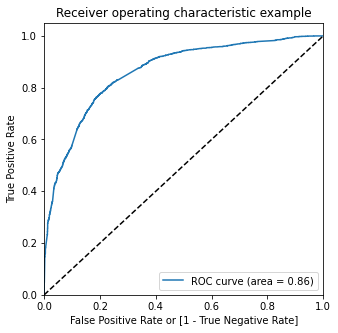

In [114]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Leadscore_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

## Finding Optimal Cutoff Point

In [115]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Leadscore_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Leadscore_Prob,CustID,predicted,leadscore_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.356556,1871,0,35.655553,1,1,1,1,0,0,0,0,0,0
1,1,0.518751,6885,1,51.875063,1,1,1,1,1,1,0,0,0,0
2,0,0.107384,3427,0,10.738368,1,1,0,0,0,0,0,0,0,0
3,0,0.882647,1525,1,88.264676,1,1,1,1,1,1,1,1,1,0
4,1,0.945666,1475,1,94.566566,1,1,1,1,1,1,1,1,1,1


In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.477415,1.000000,0.000000
0.1,0.1,0.546132,0.988425,0.142069
0.2,0.2,0.714320,0.941621,0.506667
0.3,0.3,0.756367,0.904378,0.621149
0.4,0.4,0.787362,0.803221,0.772874
0.5,0.5,0.784719,0.736286,0.828966
0.6,0.6,0.772465,0.668848,0.867126
0.7,0.7,0.736905,0.537997,0.918621
0.8,0.8,0.712878,0.448415,0.954483
0.9,0.9,0.651129,0.284852,0.985747


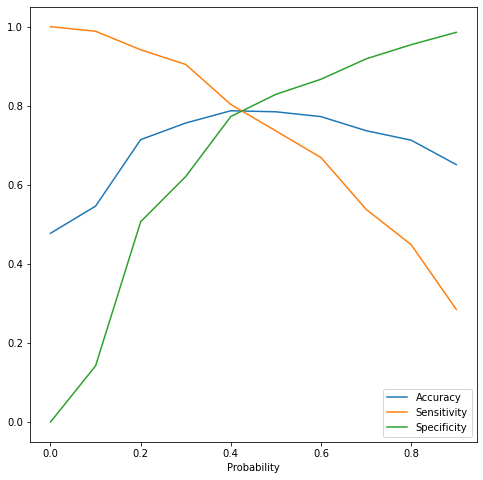

In [163]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'],figsize =(8,8))
plt.show()

As we can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [118]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Leadscore_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Leadscore_Prob,CustID,predicted,leadscore_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.356556,1871,0,35.655553,1,1,1,1,0,0,0,0,0,0,1
1,1,0.518751,6885,1,51.875063,1,1,1,1,1,1,0,0,0,0,1
2,0,0.107384,3427,0,10.738368,1,1,0,0,0,0,0,0,0,0,0
3,0,0.882647,1525,1,88.264676,1,1,1,1,1,1,1,1,1,0,1
4,1,0.945666,1475,1,94.566566,1,1,1,1,1,1,1,1,1,1,1


In [162]:
y_train_pred_final

,Converted,Leadscore_Prob,CustID,predicted,leadscore_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.356556,1871,0,35.655553,1,1,1,1,0,0,0,0,0,0,1
1,1,0.518751,6885,1,51.875063,1,1,1,1,1,1,0,0,0,0,1
2,0,0.107384,3427,0,10.738368,1,1,0,0,0,0,0,0,0,0,0
3,0,0.882647,1525,1,88.264676,1,1,1,1,1,1,1,1,1,0,1
4,1,0.945666,1475,1,94.566566,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4157,1,0.909371,3015,1,90.937100,1,1,1,1,1,1,1,1,1,1,1
4158,0,0.665788,615,1,66.578767,1,1,1,1,1,1,1,0,0,0,1
4159,1,0.410769,110,0,41.076924,1,1,1,1,1,0,0,0,0,0,1
4160,0,0.699573,6308,1,69.957267,1,1,1,1,1,1,1,0,0,0,1


In [119]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7614127823161941

## Precision and Recall

In [120]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1803,  372],
       [ 524, 1463]], dtype=int64)

In [121]:
#Precision
#TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.797275204359673

In [122]:
#Recall
#TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7362858580775038

## Precision and recall tradeoff

In [123]:
from sklearn.metrics import precision_recall_curve

In [124]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Leadscore_Prob)

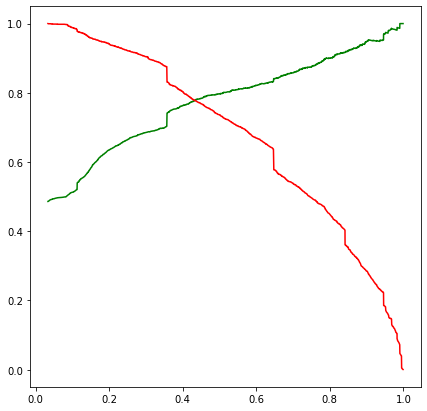

In [125]:
plt.figure(figsize=(7,7))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 5:Making predictions on the test set

In [126]:
X_test[colsumnsToScale] = scaler.transform(X_test[colsumnsToScale])
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
1340,-0.586101,0,1,0,0,0,0,0,0,0,0,0,0
3411,-0.924488,0,0,0,1,0,0,0,0,0,0,0,0
7124,-0.532388,1,0,0,0,0,0,0,0,0,0,0,0
1969,-0.924488,0,0,0,0,0,0,0,0,0,1,0,0
8567,-0.924488,0,0,0,0,0,0,1,0,0,1,0,0


In [127]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [128]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [129]:
y_pred_1.head()

,0
1340,0.179563
3411,0.841107
7124,0.121087
1969,0.646569
8567,0.305978


In [130]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [131]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [132]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [133]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [134]:
y_pred_final.head()

,Converted,CustID,0
0,1,1340,0.179563
1,1,3411,0.841107
2,0,7124,0.121087
3,1,1969,0.646569
4,1,8567,0.305978


In [135]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Leadscore_Prob'})

In [136]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Leadscore_Prob'], axis=1)

In [137]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Leadscore_Prob
0,1340,1,0.179563
1,3411,1,0.841107
2,7124,0,0.121087
3,1969,1,0.646569
4,8567,1,0.305978


In [138]:
y_pred_final['final_predicted'] = y_pred_final.Leadscore_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [139]:
y_pred_final['leadscore_score']= y_pred_final.Leadscore_Prob.map(lambda x: x*100)

In [140]:
y_pred_final.head()

,CustID,Converted,Leadscore_Prob,final_predicted,leadscore_score
0,1340,1,0.179563,0,17.956300
1,3411,1,0.841107,1,84.110659
2,7124,0,0.121087,0,12.108737
3,1969,1,0.646569,1,64.656940
4,8567,1,0.305978,0,30.597823


In [141]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.77703081232493

In [142]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[631, 287],
       [111, 756]], dtype=int64)

In [143]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [144]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8719723183391004

In [145]:
# Let us calculate specificity
TN / float(TN+FP)

0.6873638344226579

## Precision and Recall

In [146]:
#Precision
#TP / TP + FP

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7248322147651006

In [147]:
#Recall
#TP / TP + FN

confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8719723183391004

 Business Requirement has given a ballpark of the target lead conversion rate to be around 80%.

Therefore we increase our cutoff for lead probability to 0.5 inorder to achieve a precision above 80%

In [148]:
# Appending y_test_df and y_pred_1
y_pred_final2 = pd.concat([y_test_df, y_pred_1],axis=1)

In [149]:
y_pred_final2.head()

,Converted,CustID,0
0,1,1340,0.179563
1,1,3411,0.841107
2,0,7124,0.121087
3,1,1969,0.646569
4,1,8567,0.305978


In [150]:
# Renaming the column 
y_pred_final2= y_pred_final2.rename(columns={ 0 : 'Leadscore_Prob'})

In [151]:
# Rearranging the columns
y_pred_final2 = y_pred_final2.reindex(['CustID','Converted','Leadscore_Prob'], axis=1)

In [152]:
y_pred_final2.head()

,CustID,Converted,Leadscore_Prob
0,1340,1,0.179563
1,3411,1,0.841107
2,7124,0,0.121087
3,1969,1,0.646569
4,8567,1,0.305978


In [153]:
y_pred_final2['final_predicted'] = y_pred_final2.Leadscore_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [154]:
y_pred_final2['leadscore_score']= y_pred_final2.Leadscore_Prob.map(lambda x: x*100)

In [155]:
y_pred_final2.head()

,CustID,Converted,Leadscore_Prob,final_predicted,leadscore_score
0,1340,1,0.179563,0,17.956300
1,3411,1,0.841107,1,84.110659
2,7124,0,0.121087,0,12.108737
3,1969,1,0.646569,1,64.656940
4,8567,1,0.305978,0,30.597823


In [156]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final2.Converted, y_pred_final2.final_predicted)

0.7887955182072829

In [157]:
confusion3 = metrics.confusion_matrix(y_pred_final2.Converted, y_pred_final2.final_predicted )
confusion3

array([[768, 150],
       [227, 640]], dtype=int64)

In [158]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [159]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7381776239907728

In [160]:
# Let us calculate specificity
TN / float(TN+FP)

0.8366013071895425

In [161]:
#TP / TP + FP

confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.810126582278481